In [2]:
from modules.MyNetwork import MyCNNClassifier, Autoencoder

import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision.transforms

image.shape: (1527, 1080)


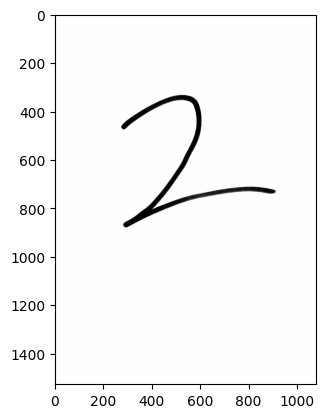

In [3]:
image = cv2.imread("imgs/Number.jpg", cv2.IMREAD_GRAYSCALE)

print("image.shape:", image.shape)

plt.imshow(image, cmap='gray')
plt.show()

(950, 950)


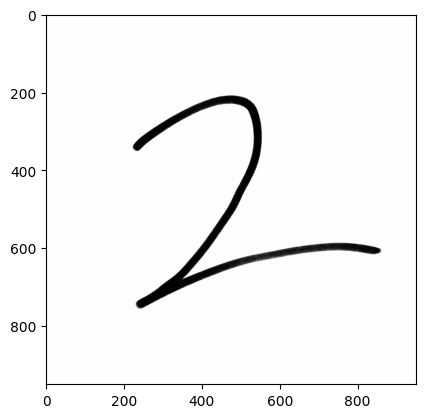

In [4]:
small_image = image[125:1075, 50:1000]
print(small_image.shape)

plt.imshow(small_image, cmap='gray')
plt.show()

(28, 28)


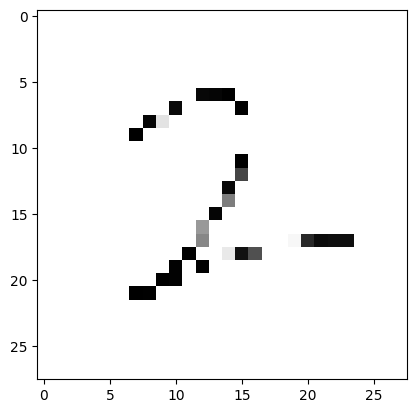

In [5]:
# input_image = cv2.resize(small_image, (500,500))
# input_image = cv2.resize(input_image, (100,100))
# input_image = cv2.resize(input_image, (28,28))

input_image = cv2.resize(small_image, (28,28))
print(input_image.shape)

plt.imshow(input_image, cmap='gray')
plt.show()

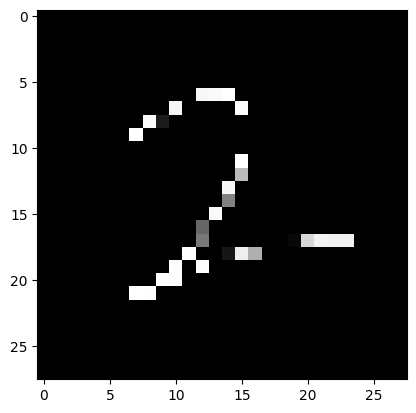

In [6]:
reversed_image = 255 - input_image
plt.imshow(reversed_image, cmap='gray')
plt.show()

# TEST

### AutoEncoder

In [6]:
# Device
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)

# Network
model = Autoencoder().to(device)

# 가중치 로드
checkpoint_path = "autoencoder/checkpoints/autoencoder_epoch10"
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['model_state_dict'])

model.eval()


device: cuda


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(7, 7), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (7): Sigmoid()
  )
)

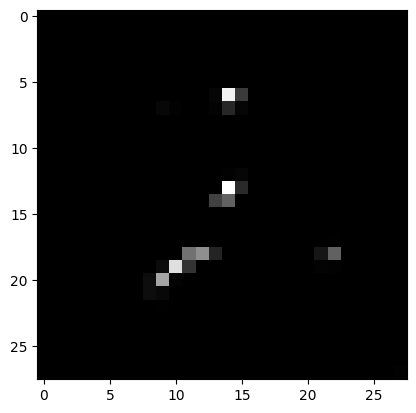

In [16]:
# inference
input_image_t = torchvision.transforms.ToTensor()(reversed_image).to(device=device)
input_image_t = input_image_t.unsqueeze(0)

output = model(input_image_t)

# 시각화
output_show = output.detach().cpu().numpy().reshape(28,28)

plt.imshow(output_show, cmap='gray')
plt.show()

### Classifier

In [20]:
# Device
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)

# Network
classifier = MyCNNClassifier().to(device)

# 가중치 로드
checkpoint_path = "mnist_classifier/checkpoints/ckpt_epoch20.pth"
checkpoint = torch.load(checkpoint_path)
classifier.load_state_dict(checkpoint['model_state_dict'])

classifier.eval()


device: cuda


MyCNNClassifier(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc): Linear(in_features=32, out_features=10, bias=True)
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

pred: [[-5.2744265   1.5318412   3.265164   -1.5439322  -4.4619994   2.079885
  -4.6307573  -0.44143826 -5.594049   -5.4451094 ]]
pred_label: 2


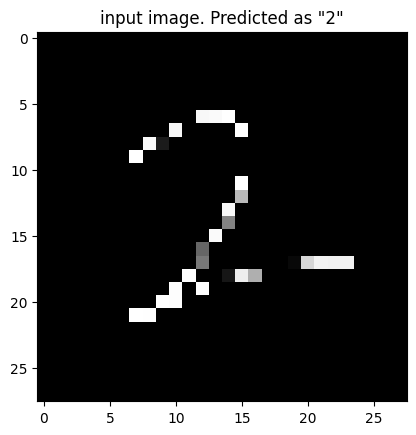

In [21]:
with torch.no_grad():

    input_image_t = torchvision.transforms.ToTensor()(reversed_image).to(device=device)
    input_image_t = input_image_t.unsqueeze(0)

    # inference
    pred = classifier(input_image_t)
    pred_label = torch.argmax(pred, dim=1)

    print("pred:", pred.detach().cpu().numpy())
    print("pred_label:", pred_label.item())

# Plot
plt.title(f"input image. Predicted as \"{pred_label.item()}\"")
plt.imshow(reversed_image, cmap='gray')
plt.show()
